In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lime import lime_tabular
from ucimlrepo import fetch_ucirepo

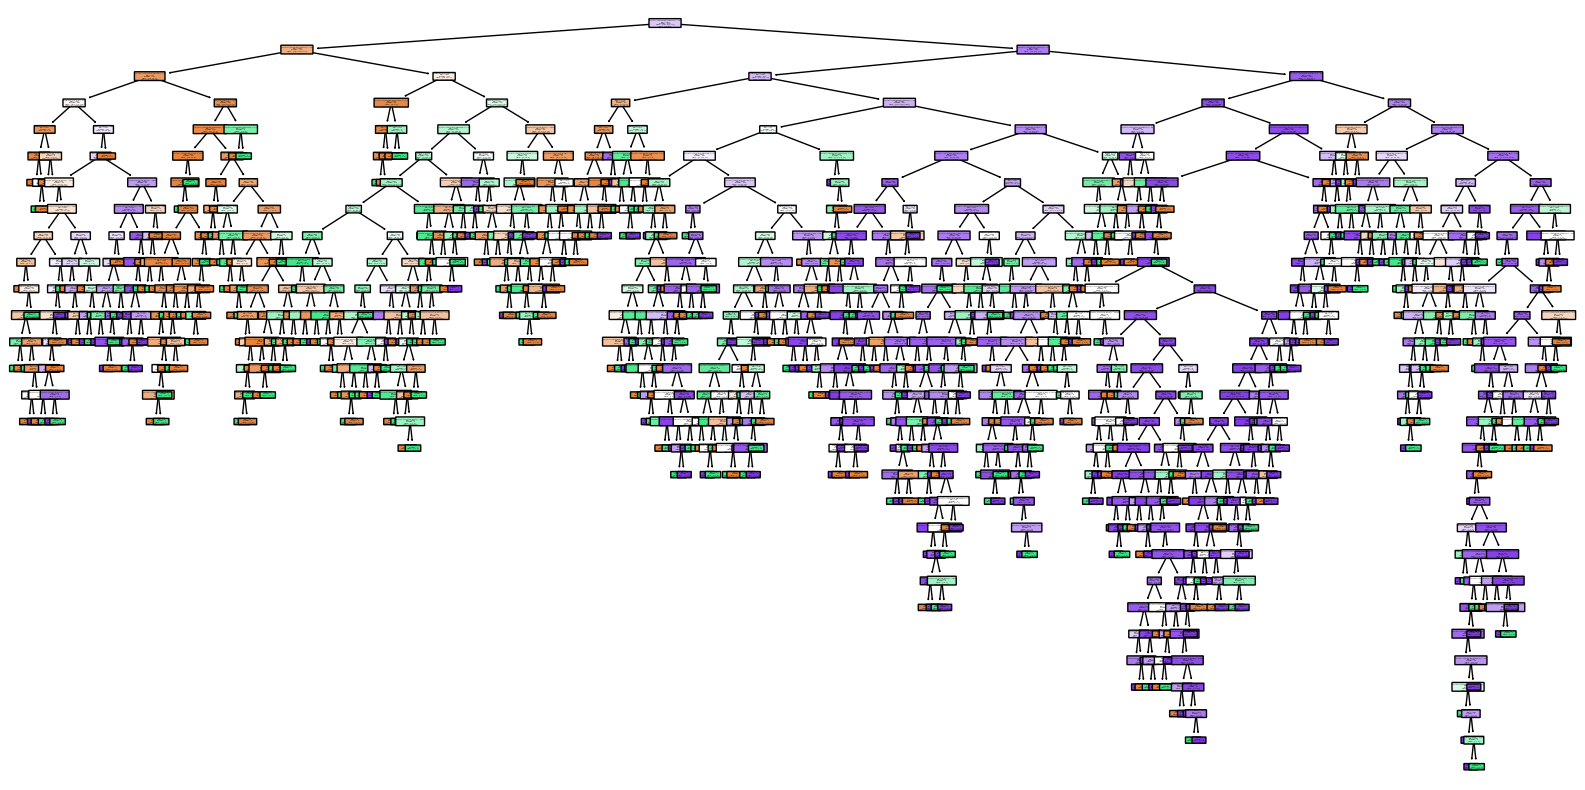

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split

# Carica il dataset
dataset = fetch_ucirepo(id=697)

# Dati (come DataFrame di pandas)
X = dataset.data.features
y = dataset.data.targets

# Definisci i nomi delle caratteristiche
feature_names = X.columns.tolist()

# Definisci i nomi dei target
target_names = ["Enrolled", "Dropout", "Graduated"]

# Dividi il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Addestra l'albero di decisione
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Visualizza l'albero di decisione
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, filled=True, feature_names=feature_names, class_names=target_names, rounded=True)
plt.show()


/home/lollo/Thesis/Python/.venv/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy of Random Forest classifier: 0.7612052730696799


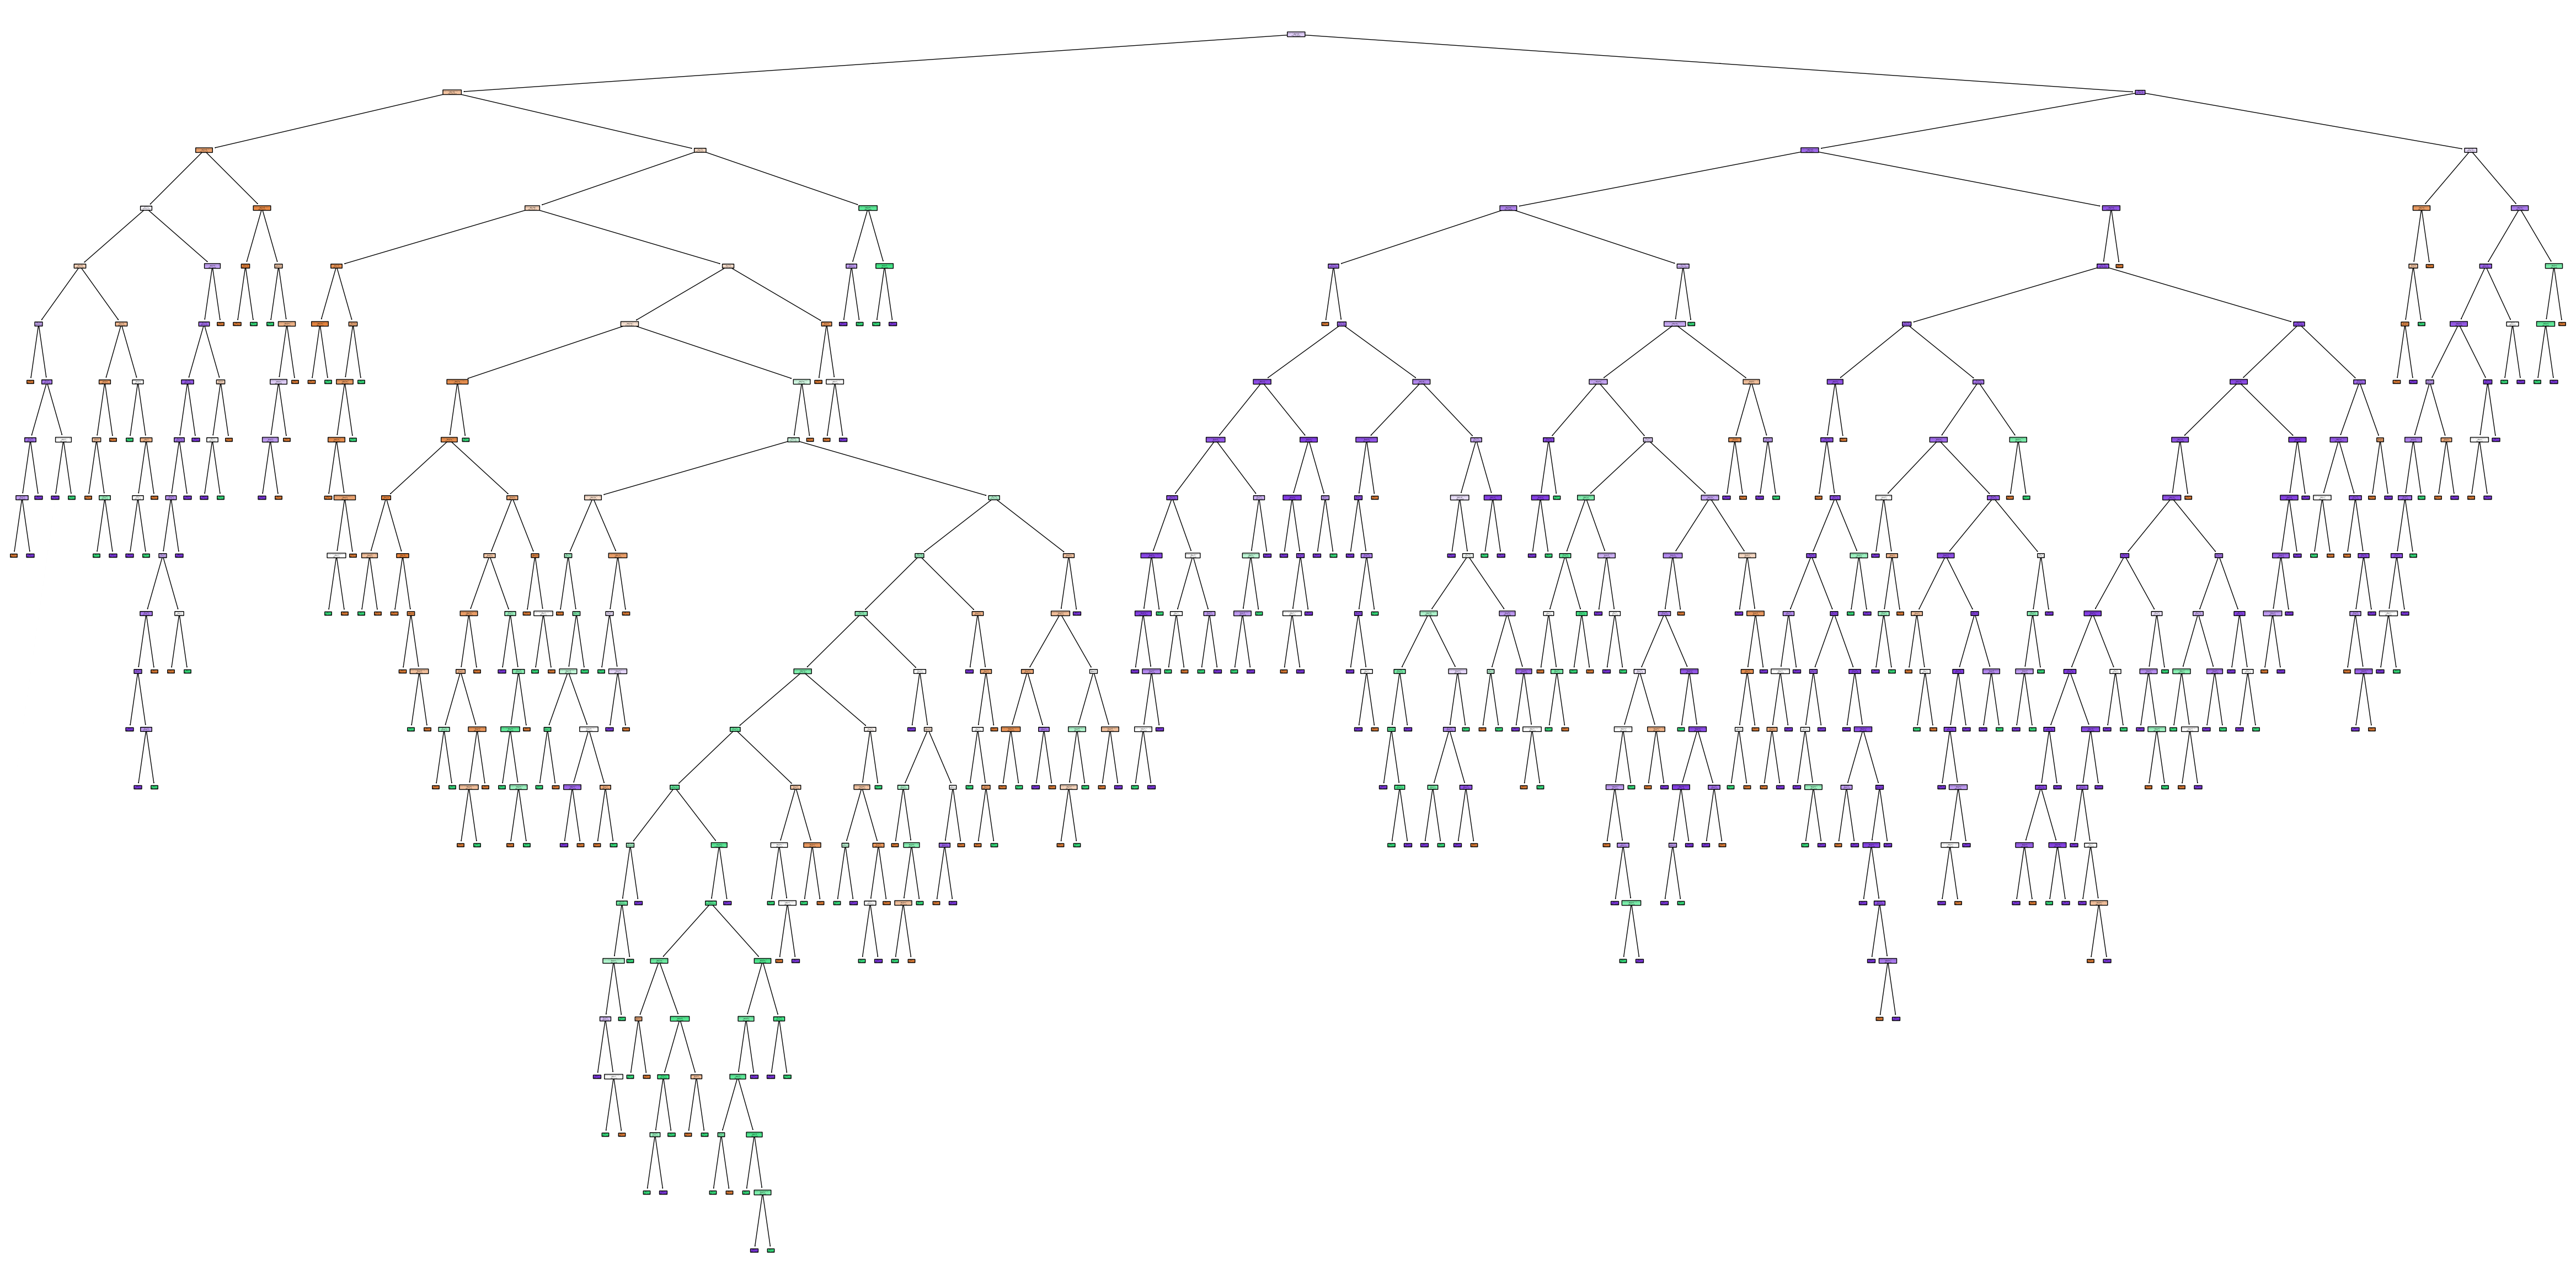

In [27]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo

# Carica il dataset
dataset = fetch_ucirepo(id=697)

# Dati (come DataFrame di pandas)
X = dataset.data.features
y = dataset.data.targets

# Definisci i nomi delle caratteristiche
feature_names = X.columns.tolist()

# Definisci i nomi dei target
target_names = ["Enrolled", "Dropout", "Graduated"]

# Dividi il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Addestra il classificatore Random Forest
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)

# Valuta l'accuratezza del classificatore
accuracy = forest_clf.score(X_test, y_test)
print('Accuracy of Random Forest classifier:', accuracy)

# Visualizza l'albero di decisione (uno degli alberi della foresta)
plt.figure(figsize=(60, 30))
plot_tree(forest_clf.estimators_[0], filled=True, feature_names=feature_names, class_names=target_names, rounded=True)
plt.show()


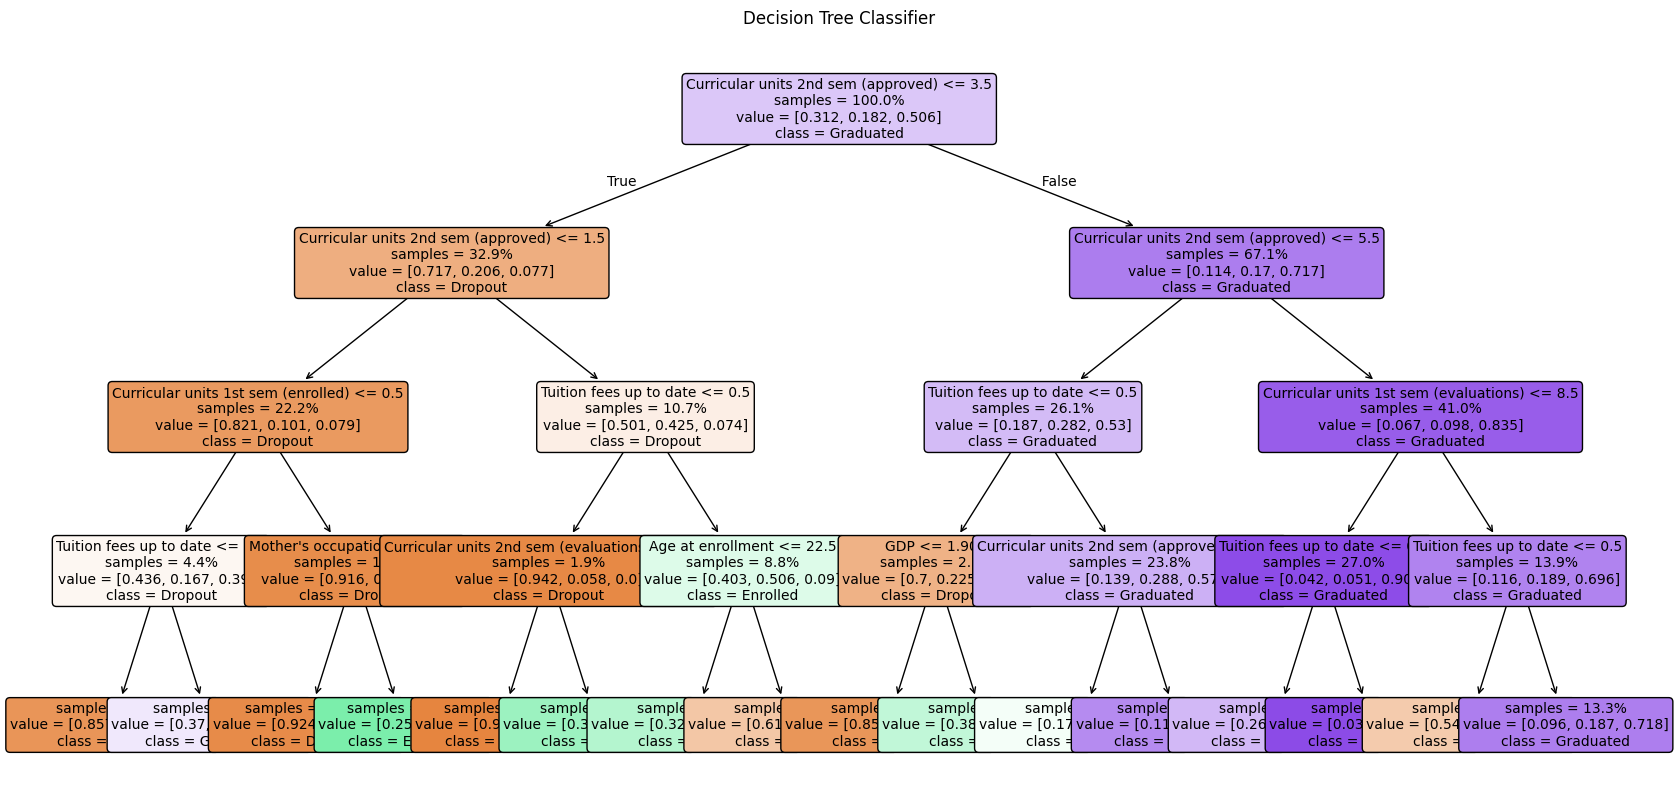

In [42]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split

# Carica il dataset
dataset = fetch_ucirepo(id=697)

# Dati (come DataFrame di pandas)
X = dataset.data.features
y = dataset.data.targets

# Definisci i nomi delle caratteristiche
feature_names = X.columns.tolist()

# Definisci i nomi dei target
target_names = ["Dropout", "Enrolled", "Graduated"]

# Dividi il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Addestra l'albero di decisione
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=4)
tree_clf.fit(X_train, y_train)

# Visualizza l'albero di decisione
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, 
          filled=True, 
          feature_names=feature_names, 
          class_names=target_names, 
          rounded=True, 
          fontsize=5, 
          proportion=True,
          impurity=False)
plt.title("Decision Tree Classifier")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from lime import lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Carica il dataset con il separatore corretto
file_path = '/home/lollo/Thesis/Python/data/data.csv'
data = pd.read_csv(file_path, delimiter=';')

# Mostra le prime righe del dataset per capire la sua struttura
print(data.head())

# Definisci i nomi delle caratteristiche
feature_names = data.columns[:-1].tolist()

# Definisci i nomi dei target
target_names = ["Dropout", "Enrolled", "Graduate"]

# Assicurati che i target siano etichettati correttamente
data['Target'] = data['Target'].replace({"Enrolled": 1, "Dropout": 0, "Graduate": 2}).astype(int)

# Dividi i dati in caratteristiche (X) e target (y)
X = data.drop('Target', axis=1)
y = data['Target']

# Verifica che la conversione sia avvenuta correttamente
print(y.value_counts())

# Dividi il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Addestra il classificatore Random Forest
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)

# Crea l'explainer LIME
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=feature_names,
    class_names=target_names,
    mode='classification'
)

# Genera spiegazioni per le prime 20 istanze del test set
for i in range(20):
    correct_label_index = y_test.iloc[i]
    correct_label = target_names[correct_label_index]
    
    predicted_label_index = forest_clf.predict([X_test.iloc[i].values])[0]
    predicted_label = target_names[predicted_label_index]
    
    print('Correct: ', correct_label)
    print('Classification: ', predicted_label)
    print(dict(zip(feature_names, X_test.iloc[i].values)))
    
    explanation = explainer.explain_instance(
        data_row=X_test.iloc[i].values,
        predict_fn=forest_clf.predict_proba,
        num_features=30
    )

    fig = explanation.as_pyplot_figure()
    plt.tight_layout()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
from lime import lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Carica il dataset con il separatore corretto
file_path = '/home/lollo/Thesis/Python/data/data.csv'
data = pd.read_csv(file_path, delimiter=';')

# Mostra le prime righe del dataset per capire la sua struttura
print(data.head())

# Definisci i nomi delle caratteristiche
feature_names = data.columns[:-1].tolist()

# Definisci i nomi dei target
target_names = ["Dropout", "Enrolled", "Graduate"]

# Assicurati che i target siano etichettati correttamente
data['Target'] = data['Target'].replace({"Enrolled": 1, "Dropout": 0, "Graduate": 2}).astype(int)

# Dividi i dati in caratteristiche (X) e target (y)
X = data.drop('Target', axis=1)
y = data['Target']

# Verifica che la conversione sia avvenuta correttamente
print(y.value_counts())

# Dividi il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Addestra il classificatore Random Forest
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)

# Crea l'explainer LIME
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=feature_names,
    class_names=target_names,
    mode='classification'
)

# Genera spiegazioni per le prime 20 istanze del test set
for i in range(20):
    correct_label_index = y_test.iloc[i]
    correct_label = target_names[correct_label_index]
    
    # Converti la riga di X_test in DataFrame con nomi di colonne
    instance = pd.DataFrame([X_test.iloc[i].values], columns=feature_names)
    predicted_label_index = forest_clf.predict(instance)[0]
    predicted_label = target_names[predicted_label_index]
    
    print('Correct: ', correct_label)
    print('Classification: ', predicted_label)
    print(dict(zip(feature_names, X_test.iloc[i].values)))
    
    explanation = explainer.explain_instance(
        data_row=X_test.iloc[i].values,
        predict_fn=forest_clf.predict_proba,
        num_features=30
    )

    fig = explanation.as_pyplot_figure()
    plt.tight_layout()
    plt.show()
